# MACHINE LEARNING - FINAL PROJECT
## KICKSTARTER
### GROUP 6: 
- Maria Baglieri Occhipinti (49638)
- Moritz Constantin Güttersberger (48845)
- Moritz Lilleholt Häckel (49558)
- Eugenia Saggioro (50958)
- Dominik Trut (46274)


### SUMMARY
**TO BE ADJUSTED**

[1. From BP to ML](#From-Business-Problem-to-Machine-Learning-Problem)
- [Business Understanding](#Business-Understanding)
- [Problem Definition](#Problem-Definition)

[2. Data Understanding](#Loading-data)

- [IDA](#Initial-Data-Analysis)
    - [Structure of Data](#Structure-of-Data)
    - [Quality of Data](#Quality-of-Data)
    - [Descriptive Statistics](Descriptive-Statistics)

- [EDA](#Exploratory-Data-Analysis)
    - [Data Preparation](#Exploratory-Data-Analysis)
        (Preprocessing: Data Normalization/Reduction/Cleaning/Reduction/Text cleaning )
    - [Data Visualization](#Data-Visualization)

[3. Feature Engineering and Selection](#Feature-Engineering-and-Selection)
- [NLP](#NLP)

[4. Modeling](#Modeling)

[5. Evaluation](#Evaluation)

[6. Deployment/Conclusions](#Conclusions)

## From Business Problem to Machine Learning Problem

#### BUSINESS UNDERSTANDING
Kickstarter is a crowdfunding platform that allows people to support creative projects. Film, gaming, and music, as well as art, design, and technology projects, are all covered.

The dataset at hand was crawled from the platform and contains detailed information about all current and historic projects on Kickstarter, as well as their status (successful, failed, canceled, live, suspended). 

Every project creator establishes a financing target (funding goal) and a deadline for their project. People can donate money to help make the concept a reality if they like it. Funding on Kickstarter is *“all-or-nothing”*. If the project meets its funding goal, all backers' credit cards will be charged after the deadline passes and Kickstarter deducts a 5% fee from pledged amount. On the other hand, if the projects fall short of its funding goal, no one is charged. 

Project creators retain complete ownership of their work. After a project is deemed successful, Kickstarter cannot be used to seek loans or to give financial returns or equity. Backers can support projects to help them come to life, not to profit monetarily. 

As stated from the platform’s website, while 10% of projects finished having never received a single pledge, 78% of projects that raised more than 20% of their goal were successfully funded. Therefore Kickstarter has a great potential to bring ideas to fruition

#### PROBLEM DEFINITION

During the course of this project, we will take the perspective of project creators to assist them in optimizing their proposal. 

For a project’s success or failure on crowdfunding platforms, it’s important to consider the influence of all the factors characterizing that project. Some of these factors can be measured or classified, allowing for the development of a model to forecast whether a project will succeed or fail. 

Some projects are more successful than others and our intuition is that this does not always depend on the key idea. Some projects might fail because they don’t hit the target (backers) due to wrong descriptions, uncommon topic, too high funding goal or simply the project doesn’t seem trustworthy

The goal of this project is to analyze Kickstarter projects’ data and build a useful model for project creators to understand which features attract backers the most or which projects are most likely to collect a higher amount. We will try to find the main patterns and the odds of a project’s success. Thanks to this model, decision makers (project creators) will gain useful insights before publishing their project on the platform.

In order to achieve the goal explained above, we will use a dataset crawled from Kickstarter, which contains detailed information about all current and historic projects on Kickstarter, as well as their status (successful, failed, canceled, live, suspended). The dataset contains all the projects hosted between **MISSING** and **MISSING**.

Given the **big amount** of original data available (205696 projects with more than 37 variables), and the reasons explained below, it is reasonable to involve automation to solve this problem. 
- There is no existing formula to answer the main question.The features of each project set on the platform contribute in different ways to its success and this cannot be translated into simple rules.
- Analyzing the probability of success and which are the main drivers of the end result, project by project, would **not** be **feasible**. 
- Some columns like the description of the project (blurb) contain **unstructured text** which needs to be analyzed. Nevertheless, there are few features with unstructured text. 

All in all, there is a big potential for data to be **represented in a meaningful way**, with both numbers and categorical values (e.g. state, status, location). 

#### STRUCTURE OF THE DATA

The amount of data available is enough to build a machine learning model. We have information regarding:
- The type of the project (category, subcategory, brief description, its profile)
- The creator
- The start date, the duration of the crowdfunding, and the date when the status of the project was changed 
- The funding goal, the pledged amount, the original currency, the exchange rate and the converted pledged amount. 
- The number of backers achieved. 
For more information regarding the variables available, please see the **DATA CLEANING** section.

The **quality** and the **quantity** of data are fundamental to building an efficient model. The data available is complete and consistent across the datasets. There are some variables with almost all empty cells (friends, is_starred, etc.) and some others with an invalid format (category, creator, location, etc.) that must be modified. 

Around 55% of the projects available are successful, ~ 36% are labeled as failed and the rest is live/canceled/suspended. This means we have little information regarding the canceled projects. Nevertheless, we have a big and balanced amount of successful and failed projects. 

12% of the projects are current ones, while around 88% are past projects. This difference is valuable since we will work on past projects to build an efficient model and apply it to current projects. 

Projects are split into 15 categories and 159 subcategories. As we can see on the right, Music, Film & Video and Technology are the categories with more projects while Dance is the category with only 3 subcategories and 3156 projects (less than 2% of the entire dataset).

All in all, we can state the quality of data is good enough to work on it and create a model. 

Data available presents **regular patterns** between the independent variables (inputs) and the final result (success/failure, pledged amount)
These patterns are necessary for the model to learn from them and to extract a valid output.

**WE MISS A PART DESCRIBING IF WE DROP SOME VARIABLES AND WHY, IF WE WILL USE NLP AND WHY, AND PARTS LIKE Some features were initially retained for exploratory data analysis (EDA) purposes, but were then dropped in order to use machine learning models. These included features that are related to outcomes (e.g. the amount pledged and the number of backers) rather than related to the properties of the project itself (e.g. category, goal, length of campaign). IN THE EDA**

 
#### EVALUATION OF THE MODEL – criteria
**TO BE REVIEWED**
1. Proportion of the projects where the model accurately predicted the final success or failure of the project. 
2. The difference between the level of the pledged amount predicted by the model against the amount achieved 
3. The number of backers predicted for the specific type of project from the model versus the actual amount of backers


## Loading data

Import the dataset:

In [1]:
import pandas as pd
import numpy as np
import os
import datetime


Merge all the csv files to have all the data together.

In [2]:
files = [file for file in os.listdir('Kickstarter_Dataset')]

all_df = pd.DataFrame()

for file in files:
    df = pd.read_csv('./Kickstarter_Dataset/'+file)
    all_df = pd.concat([all_df, df])
    
all_df.to_csv("Kickstarter_Complete.csv", index = False)

Import the complete dataset.

In [4]:
df = pd.read_csv("Kickstarter_Complete.csv")

df.head()

,backers_count,blurb,category,converted_pledged_amount,country,created_at,creator,currency,currency_symbol,currency_trailing_code,...,slug,source_url,spotlight,staff_pick,state,state_changed_at,static_usd_rate,urls,usd_pledged,usd_type
0,210,Believing Heart Tarot is a one of a kind addit...,"{""id"":21,""name"":""Digital Art"",""slug"":""art/digi...",14166,US,1513372142,"{""id"":1647802423,""name"":""Catstealers-Zines"",""s...",USD,$,True,...,believing-heart-tarot-deck,https://www.kickstarter.com/discover/categorie...,True,False,successful,1522555142,1.0,"{""web"":{""project"":""https://www.kickstarter.com...",14166.00,international
1,3,Be a part of Street Art Magic and have a hand ...,"{""id"":53,""name"":""Public Art"",""slug"":""art/publi...",42,US,1390444485,"{""id"":1960090658,""name"":""Inman E. Goodman III""...",USD,$,True,...,zone-7-street-arts-initiative,https://www.kickstarter.com/discover/categorie...,False,False,failed,1392323039,1.0,"{""web"":{""project"":""https://www.kickstarter.com...",42.00,international
2,31,My writing changed after my daughter was kille...,"{""id"":359,""name"":""Print"",""slug"":""journalism/pr...",1127,US,1404688773,"{""id"":2049496016,""name"":""Diane Neas"",""is_regis...",USD,$,True,...,loving-becca-journey-of-child-loss,https://www.kickstarter.com/discover/categorie...,True,False,successful,1407702831,1.0,"{""web"":{""project"":""https://www.kickstarter.com...",1127.00,international
3,4,The Sweet Botanist's natural syrups are made s...,"{""id"":307,""name"":""Drinks"",""slug"":""food/drinks""...",105,US,1464156479,"{""id"":1723204437,""name"":""Amber M."",""is_registe...",USD,$,True,...,the-sweet-botanist-syrup-co,https://www.kickstarter.com/discover/categorie...,False,False,failed,1466802580,1.0,"{""web"":{""project"":""https://www.kickstarter.com...",105.00,international
4,800,The digital restoration of the classic 1968 Ro...,"{""id"":30,""name"":""Documentary"",""slug"":""film & v...",28720,US,1331149074,"{""id"":1765735821,""name"":""Fred Padula"",""is_regi...",USD,$,True,...,el-capitan-film-restoration,https://www.kickstarter.com/discover/categorie...,True,False,successful,1351739753,1.0,"{""web"":{""project"":""https://www.kickstarter.com...",28720.42,international


In [5]:
df.dtypes

backers_count                 int64
blurb                        object
category                     object
converted_pledged_amount      int64
country                      object
created_at                    int64
creator                      object
currency                     object
currency_symbol              object
currency_trailing_code         bool
current_currency             object
deadline                      int64
disable_communication          bool
friends                      object
fx_rate                     float64
goal                        float64
id                            int64
is_backing                   object
is_starrable                   bool
is_starred                   object
launched_at                   int64
location                     object
name                         object
permissions                  object
photo                        object
pledged                     float64
profile                      object
slug                        

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205696 entries, 0 to 205695
Data columns (total 37 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   backers_count             205696 non-null  int64  
 1   blurb                     205686 non-null  object 
 2   category                  205696 non-null  object 
 3   converted_pledged_amount  205696 non-null  int64  
 4   country                   205696 non-null  object 
 5   created_at                205696 non-null  int64  
 6   creator                   205696 non-null  object 
 7   currency                  205696 non-null  object 
 8   currency_symbol           205696 non-null  object 
 9   currency_trailing_code    205696 non-null  bool   
 10  current_currency          205696 non-null  object 
 11  deadline                  205696 non-null  int64  
 12  disable_communication     205696 non-null  bool   
 13  friends                   276 non-null     o

## Data Cleaning

#### Columns to delete.

We decided to preliminary delete the following columns as they are not useful for our analysis: 
- currency_symbol: the symbol of the original currency the project goal was denominated in.
- currency_trailing_code: the code of the original currency the project goal was denominated in.
- id: id number of the project.
- photo: contains a link and information to the project's image.
- permissions: just 276 values. 
- friends: just 274 values.
- source_url: url for the project's category.
- is_backing: just 276 values.
- is_starred: just 276 values.
- usd_type: international or domestic.

In [6]:
del df['currency_symbol']
del df['currency_trailing_code']
del df['id']
del df['photo']
del df['permissions']
del df['friends']
del df['source_url']
del df['is_backing']
del df['is_starred']
del df['usd_type']

#### Rename backers_count into nr_backers.
backers_count shows the number of backers for that project.

In [7]:
df=df.rename(columns={"backers_count":"nr_backers"})

#### Create 3 new columns from the category column: category, subcategory and category_id.

In [8]:
df=df.rename(columns={"category":"Category"})

In [9]:
df['category'] = df['Category'].apply(lambda x: x.split('"slug":"')[1].split('/')[0])
df['category'] = df['category'].apply(lambda x: x.split('"')[0])
df['subcategory'] = df['Category'].apply(lambda x: x.split('"name":"')[1].split('"')[0])
df['subcategory_id'] = df['Category'].apply(lambda x: x.split('"id":')[1].split(',')[0])

In [10]:
del df['Category']

#### Modify the date time columns.

In [11]:
df['created_at'] = pd.to_datetime(df['created_at'], unit="s").dt.date
df['state_changed_at'] = pd.to_datetime(df['state_changed_at'], unit="s").dt.date
df['deadline'] = pd.to_datetime(df['deadline'], unit="s").dt.date
df['launched_at'] = pd.to_datetime(df['launched_at'], unit="s").dt.date

In [12]:
df.head()

,nr_backers,blurb,converted_pledged_amount,country,created_at,creator,currency,current_currency,deadline,disable_communication,...,spotlight,staff_pick,state,state_changed_at,static_usd_rate,urls,usd_pledged,category,subcategory,subcategory_id
0,210,Believing Heart Tarot is a one of a kind addit...,14166,US,2017-12-15,"{""id"":1647802423,""name"":""Catstealers-Zines"",""s...",USD,USD,2018-04-01,False,...,True,False,successful,2018-04-01,1.0,"{""web"":{""project"":""https://www.kickstarter.com...",14166.00,art,Digital Art,21
1,3,Be a part of Street Art Magic and have a hand ...,42,US,2014-01-23,"{""id"":1960090658,""name"":""Inman E. Goodman III""...",USD,USD,2014-02-13,False,...,False,False,failed,2014-02-13,1.0,"{""web"":{""project"":""https://www.kickstarter.com...",42.00,art,Public Art,53
2,31,My writing changed after my daughter was kille...,1127,US,2014-07-06,"{""id"":2049496016,""name"":""Diane Neas"",""is_regis...",USD,USD,2014-08-10,False,...,True,False,successful,2014-08-10,1.0,"{""web"":{""project"":""https://www.kickstarter.com...",1127.00,journalism,Print,359
3,4,The Sweet Botanist's natural syrups are made s...,105,US,2016-05-25,"{""id"":1723204437,""name"":""Amber M."",""is_registe...",USD,USD,2016-06-24,False,...,False,False,failed,2016-06-24,1.0,"{""web"":{""project"":""https://www.kickstarter.com...",105.00,food,Drinks,307
4,800,The digital restoration of the classic 1968 Ro...,28720,US,2012-03-07,"{""id"":1765735821,""name"":""Fred Padula"",""is_regi...",USD,USD,2012-11-01,False,...,True,False,successful,2012-11-01,1.0,"{""web"":{""project"":""https://www.kickstarter.com...",28720.42,film & video,Documentary,30


The timeframe in which this projects have been created is:

#### Create 4 new columns from the creator one: creator_id, creator_name, is_registered.

In [12]:
df['creator_id'] = df['creator'].apply(lambda x: x.split('"id":')[1].split(',')[0])
df['creator_name'] = df['creator'].apply(lambda x: x.split('"name":"')[1].split('"')[0])
df['is_creator_registered'] = df['creator'].apply(lambda x: x.split('"is_registered":')[1].split(',')[0])

In [13]:
del df['creator']

#### Create 2 new columns from the location one: city and state.

In [14]:
df['nation'] = df['location'].astype(str).apply(lambda x: x.split('"state":"')[1].split('"')[0] if len(x.split('"state":"'))>1 else x.split('-')[0])
df['city'] = df['location'].astype(str).apply(lambda x: x.split('"name":"')[1].split('"')[0] if len(x.split('"name":"'))>1 else x.split('-')[0])

In [15]:
del df['location']

#### Create 2 columns from the profile one: project_id and project_status.

In [16]:
df['project_id'] = df['profile'].apply(lambda x: x.split('"id":')[1].split(',')[0])
df['project_status'] = df['profile'].apply(lambda x: x.split('"state":"')[1].split('"')[0])

In [17]:
del df['profile']

#### Modify the urls column.

In [18]:
df['url'] = df['urls'].apply(lambda x: x.split('"project":"')[1].split('"')[0])

In [19]:
del df['urls']

#### Converting the goal in USD.

In [20]:
df['usd_goal'] = round(df['goal'] * df['static_usd_rate'],2)

Given that we have a new column with the goal of all projects in USD we can drop these two columns:

In [21]:
del df['goal']
del df['static_usd_rate']

#### Dropping duplicates

Check the number of projects that are listed more than one and drop them.

In [23]:
print(f"The number of duplicates is {len(df[df.duplicated(subset='project_id')])} over {len(df)} projects.")

The number of duplicates is 18622 over 205696 projects.


In [22]:
df.drop_duplicates(inplace=True)

#### Feature engineering.

Creating new columns that can be useful for our analysis. 

In [23]:
#Name: Word length
df['name_len'] = df['name'].str.split().str.len()
df.name_len.fillna(0, inplace=True)

#Blurb: Word length
df['blurb_len'] = df['blurb'].str.split().str.len()
df.blurb_len.fillna(0, inplace=True)

#Average pledge per backer
df['pledge_per_backer'] = round(df['usd_pledged']/df['nr_backers'],2)

In [24]:
#Time between creating and launching the project
df['creation_to_launch_days'] = df['launched_at'] - df['created_at']
df['creation_to_launch_days'] = df['creation_to_launch_days'].dt.round('d').dt.days

In [25]:
#Length of the campaign
df['campaign_days'] = df['deadline'] - df['launched_at']
df['campaign_days'] = df['campaign_days'].dt.round('d').dt.days

In [26]:
# Launch and deadline day of week
df['launched_at'] = pd.to_datetime(df.launched_at, format='%Y-%m-%d')
df['launch_day'] = df['launched_at'].dt.day_name()
df['deadline'] = pd.to_datetime(df.deadline, format='%Y-%m-%d')
df['deadline_day'] = df['deadline'].dt.day_name()

# Launch and deadline month
df['launch_month'] = df['launched_at'].dt.month_name()
df['deadline_month'] = df['deadline'].dt.month_name()

In [29]:
df.dtypes

nr_backers                           int64
blurb                               object
converted_pledged_amount             int64
country                             object
created_at                          object
currency                            object
current_currency                    object
deadline                    datetime64[ns]
disable_communication                 bool
fx_rate                            float64
is_starrable                          bool
launched_at                 datetime64[ns]
name                                object
pledged                            float64
slug                                object
spotlight                             bool
staff_pick                            bool
state                               object
state_changed_at                    object
usd_pledged                        float64
category                            object
subcategory                         object
subcategory_id                      object
creator_id 

#### Ordering the columns.

In [27]:
df = df[['project_id', 'state', 'name','name_len', 'slug', 'blurb','blurb_len', 'url', 'category', 'subcategory','subcategory_id', 
         'country', 'created_at', 'nation', 'city', 
         'launched_at','launch_day','launch_month','creation_to_launch_days','deadline','deadline_day','deadline_month','campaign_days', 
         'nr_backers','pledge_per_backer', 'usd_goal', 'pledged', 'currency', 'usd_pledged', 'current_currency', 
         'fx_rate', 'project_status', 'state_changed_at', 'disable_communication', 'is_starrable', 'spotlight', 'staff_pick' ]]

#### Saving the new dataset.

In [31]:
df.to_csv("Cleaned_Kickstarter.csv", index = False)

#### Description of our final variables.

- project_id: id of the project.
- state: status of the project (successful, failed, canceled, live, suspended)
- name: name of the project.
- name_len: length of the name. 
- slug: nickname of the project.
- blurb: description of what’s the project about.
- blurb_len: length of the blurb.
- url: url of the project.
- category: category of the project.
- subcategory: subcategory of the project.
- subcategory_id: id of the subcategory of the project.
- creator_id: id of the creator of the project.
- creator_name: name of the creator of the project.
- is_creator_registered: 
- country: country where the project has originated.
- nation: nation where the project has originated.
- city: city where the project has originated.
- created_at: when the project has been created - yyyy/mm/dd.
- launched_at: launch date of the project - yyyy/mm/dd.
- launch_day: day of the week in which the project has been launched. 
- launch_month: month in which the project has been launched.
- creation_to_launch_days: number of days between the creation and the launch of the project.
- deadline: deadline of the project - yyyy/mm/dd.
- deadline_day: day of the week in which the project has been closed. 
- deadline_month: month in which the project has been closed.
- campaign_days: number of days between the launch and the deadline. 
- nr_backers: number of backers for the project.
- pledge_per_backer: total amount of money pledged divided by the number of backers. 
- usd_goal: amount of money for reaching the goal in usd.
- pledged: pledged amount in the initial currency.
- currency: currency of the project.
- usd_pledged: pledged amount multiplied for the static usd rate.             
- current_currency: current currency of the project.
- fx_rate: exchange rate.                                 
- project_status.          
- state_changed_at: when the state of the project changed - yyyy/mm/dd.         
- disable_communication: status about communication, id false for all campaigns that have ended.   
- is_starrable: how successful Kickstarter believes the campaign will be.           
- spotlight: after your project is successfully funded you will gain access to the Spotlight page tool which allows you to make a home for your project.   
- staff_pick: feature that highlights promising projects on the site to give them a boost by helping them get exposure through email newsletter and highlighted spots around the site.

The timeframe in which these projects have been created is:

In [32]:
print(f"Between {min(df.created_at).strftime('%d %B %Y')} and {max(df.created_at).strftime('%d %B %Y')}.")

Between 21 April 2009 and 18 October 2018.


##  Exploratory Data Analysis

### Main Statistics

How many successful/failed/canceled projects?

In [33]:
df['state'].value_counts(normalize=True) * 100

successful    53.284702
failed        39.392096
canceled       4.513259
live           2.483562
suspended      0.326381
Name: state, dtype: float64

Statistics regarding categories and subcategories available

In [34]:
nr_category = df['category'].nunique()
nr_subcategory = df['subcategory'].nunique()
active_projects = df['project_status'].value_counts()

print(f'There are {nr_category} categories')
print(f'There are {nr_subcategory} subcategories')
print(f'There are {active_projects[1]} current projects and {active_projects[0]} past ones')

There are 15 categories
There are 159 subcategories
There are 22411 current projects and 166632 past ones


In [35]:
df_category = pd.DataFrame({ 'Nr of subcategories': df.groupby('category')['subcategory'].nunique(),
                            'Projects per category': df.groupby('category')['project_id'].nunique()
                           }).sort_values('Projects per category', ascending = False)
df_category["Frequency"] = df_category['Projects per category']/df_category['Projects per category'].sum()*100

df_category

,Nr of subcategories,Projects per category,Frequency
category,,,
music,19,25359,13.555598
film & video,20,25274,13.510162
technology,16,19087,10.202914
art,13,18621,9.953815
publishing,18,17797,9.513348
food,13,15688,8.385986
games,8,11809,6.312475
fashion,9,11153,5.961812
comics,6,8166,4.365118


In [36]:
cat_sub = df.groupby(['category','subcategory']).size()
cat_sub_frame = cat_sub.to_frame()
cat_sub_frame

0
category subcategory         
art      Art              730
         Ceramics         345
         Conceptual Art  1098
         Digital Art     1587
         Illustration    2404
...                       ...
theater  Immersive        391
         Musical         1012
         Plays           1522
         Spaces           224
         Theater         2331

[169 rows x 1 columns]

#### Statistic evaluation:
- mean/median # of backers or amout collected per cat/subcat
- correlation? 
    - on nr_backers, usd_pledged, category, subcategory

In [37]:
df.columns

Index(['project_id', 'state', 'name', 'name_len', 'slug', 'blurb', 'blurb_len',
       'url', 'category', 'subcategory', 'subcategory_id', 'country',
       'created_at', 'nation', 'city', 'launched_at', 'launch_day',
       'launch_month', 'creation_to_launch_days', 'deadline', 'deadline_day',
       'deadline_month', 'campaign_days', 'nr_backers', 'pledge_per_backer',
       'usd_goal', 'pledged', 'currency', 'usd_pledged', 'current_currency',
       'fx_rate', 'project_status', 'state_changed_at',
       'disable_communication', 'is_starrable', 'spotlight', 'staff_pick'],
      dtype='object')

In [38]:
pd.set_option('display.max_columns', None)

df_grouped = df.groupby('category')
df_grouped.describe()

name_len                                               blurb_len  \
                count      mean       std  min  25%  50%  75%   max     count   
category                                                                        
art           18641.0  5.646317  2.616955  0.0  4.0  5.0  8.0  16.0   18641.0   
comics         8192.0  5.743042  2.668474  1.0  4.0  5.0  8.0  21.0    8192.0   
crafts         6071.0  5.370614  2.573343  1.0  3.0  5.0  7.0  18.0    6071.0   
dance          3183.0  5.697141  2.679627  1.0  4.0  6.0  8.0  17.0    3183.0   
design         6734.0  5.889664  2.630382  1.0  4.0  6.0  8.0  14.0    6734.0   
fashion       11525.0  5.991063  2.645818  1.0  4.0  6.0  8.0  17.0   11525.0   
film & video  25323.0  5.130553  2.807310  1.0  3.0  5.0  7.0  19.0   25323.0   
food          15700.0  5.528344  2.625952  1.0  3.0  5.0  8.0  20.0   15700.0   
games         12593.0  5.438498  2.819070  1.0  3.0  5.0  8.0  17.0   12593.0   
journalism     4622.0  5.371701  2.760646  1.0  3.0  5.0  7.0  15.0    4622.0   
music         25419.0  6.312994  2.600425  1.0  4.0  6.0  8.0  19.0   25419.0   
photography    7319.0  5.554584  2.621154  1.0  3.0  5.0  8.0  17.0    7319.0   
publishing    17830.0  6.095681  2.693171  1.0  4.0  6.0  8.0  18.0   17830.0   
technology    19240.0  6.077079  2.870606  1.0  4.0  6.0  8.0  16.0   19240.0   
theater        6651.0  6.000902  2.665852  1.0  4.0  6.0  8.0  17.0    6651.0   

                                                                \
                   mean       std  min   25%   50%   75%   max   
category                                                         
art           19.017596  5.055264  0.0  16.0  20.0  23.0  35.0   
comics        19.553101  4.536224  0.0  17.0  20.0  23.0  31.0   
crafts        18.621314  5.449731  0.0  16.0  20.0  23.0  31.0   
dance         19.371034  3.967926  3.0  17.0  20.0  22.0  30.0   
design        18.182061  4.930179  1.0  15.0  19.0  22.0  31.0   
fashion       18.000174  5.183763  0.0  15.0  19.0  22.0  31.0   
film & video  19.690874  4.928396  1.0  17.0  21.0  23.0  35.0   
food          19.283121  5.070963  0.0  17.0  20.0  23.0  32.0   
games         18.969825  4.825435  1.0  16.0  20.0  22.0  31.0   
journalism    19.509952  4.619826  1.0  17.0  20.0  23.0  32.0   
music         19.898265  5.138436  1.0  17.0  21.0  23.0  34.0   
photography   19.057795  4.825381  1.0  17.0  20.0  22.0  34.0   
publishing    19.336736  4.549824  1.0  17.0  20.0  22.0  33.0   
technology    18.858368  4.640219  0.0  17.0  20.0  22.0  32.0   
theater       19.710419  4.291665  0.0  18.0  20.0  23.0  32.0   

             creation_to_launch_days                                         \
                               count       mean         std  min  25%   50%   
category                                                                      
art                          18641.0  32.351859   94.822830  0.0  2.0   8.0   
comics                        8192.0  59.086182  148.477160  0.0  4.0  16.0   
crafts                        6071.0  29.925712   93.006327  0.0  1.0   5.0   
dance                         3183.0  29.176249   77.086967  0.0  3.0  10.0   
design                        6734.0  48.530294  106.967474  0.0  5.0  16.0   
fashion                      11525.0  49.743254  112.170602  0.0  4.0  14.0   
film & video                 25323.0  35.120049  111.335618  0.0  2.0   7.0   
food                         15700.0  47.519045  122.924254  0.0  2.0   9.0   
games                        12593.0  52.231954  124.496549  0.0  4.0  15.0   
journalism                    4622.0  27.602986   87.275242  0.0  1.0   5.0   
music                        25419.0  37.738975  103.229190  0.0  2.0   9.0   
photography                   7319.0  32.931275  100.009214  0.0  1.0   6.0   
publishing                   17830.0  43.788054  112.682691  0.0  3.0  11.0   
technology                   19240.0  55.196881  118.435018  0.0  5.0  17.0   
theater               

In [39]:
df_grouped.mean()

,name_len,blurb_len,creation_to_launch_days,campaign_days,nr_backers,pledge_per_backer,usd_goal,pledged,usd_pledged,fx_rate,disable_communication,is_starrable,spotlight,staff_pick
category,,,,,,,,,,,,,,
art,5.646317,19.017596,32.351859,32.496808,50.744005,65.370247,16906.618714,4421.427673,3735.832455,1.006667,0.001663,0.018132,0.520144,0.117537
comics,5.743042,19.553101,59.086182,32.498291,184.208740,44.007575,6948.103313,9565.338721,8981.543860,0.999375,0.001587,0.026123,0.765747,0.264282
crafts,5.370614,18.621314,29.925712,31.119420,40.970845,51.934797,9323.202794,5314.486378,2563.754875,0.991817,0.007906,0.017131,0.408005,0.088947
dance,5.697141,19.371034,29.176249,32.300974,50.830977,81.239878,8360.102925,4490.540974,4158.298130,1.003366,0.004084,0.006283,0.773170,0.207980
design,5.889664,18.182061,48.530294,33.556727,298.290169,85.053993,71216.145768,26096.646883,25391.202804,1.001762,0.003416,0.075290,0.535789,0.143451
fashion,5.991063,18.000174,49.743254,31.853189,124.045987,89.676078,15976.435046,13937.905827,11776.213277,1.026166,0.004165,0.032798,0.561735,0.099436
film & video,5.130553,19.690874,35.120049,34.999921,93.880188,93.237727,117138.058223,10197.553878,8429.275124,1.001760,0.001896,0.015598,0.541918,0.124748
food,5.528344,19.283121,47.519045,33.976815,64.252293,78.984933,47415.461375,6717.653636,5944.019879,0.995557,0.004013,0.014650,0.339108,0.114076
games,5.438498,18.969825,52.231954,32.524895,528.433812,57.584055,36435.319015,35130.446902,31557.463956,1.031669,0.005638,0.065830,0.564917,0.164298


### Visualization

In [40]:
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import cm

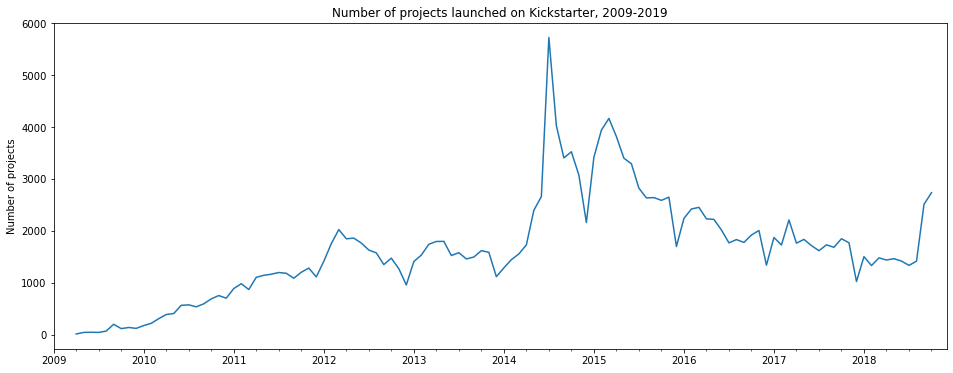

In [41]:
plt.figure(figsize=(16,6))
df['launched_at'] = pd.to_datetime(df['launched_at'])
df.set_index('launched_at').category.resample('M').count().plot() #resampling time series to Months
plt.xlim('2009-01-01', '2018-12-31')
plt.xlabel('')
plt.ylabel('Number of projects')
plt.title('Number of projects launched on Kickstarter, 2009-2019')
plt.show()

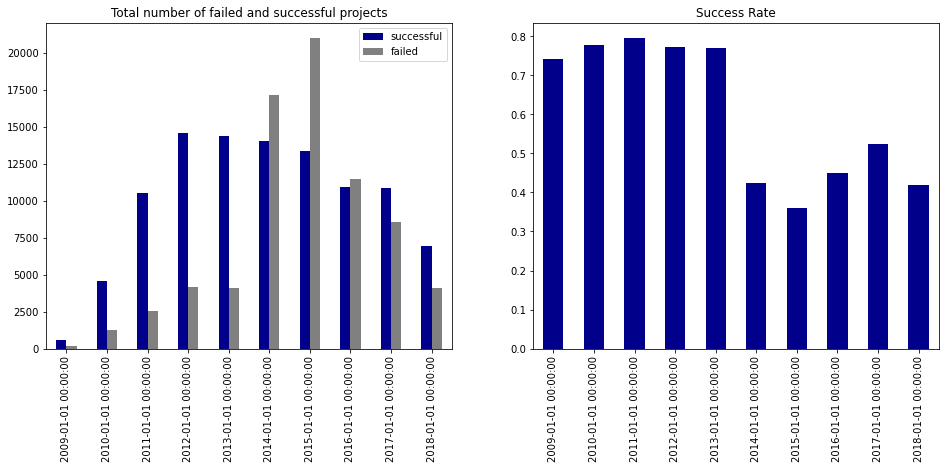

In [42]:
#year_df['launched_at'] = pd.to_datetime(year_df['launched_at'],format='%Y')
year_df = df.set_index('launched_at').state
year_df = pd.get_dummies(year_df).resample('YS').sum()
year_df1 = year_df[['successful', 'failed']]

fig, ax = plt.subplots(1,2, figsize=(16,6))
year_df1.plot.bar(ax=ax[0], color=['darkblue', 'grey'])
ax[0].set_title('Total number of failed and successful projects')
ax[0].set_xlabel('')

year_df1["successful"].div(year_df.sum(axis=1), axis=0).plot(kind='bar', ax=ax[1], color='darkblue') # Normalizes counts across rows
ax[1].set_title('Success Rate')
ax[1].set_xlabel('')
plt.show()

The left image depicts the total number of failed and successful projects, which indicated that the total number of failures and successes have been decreading since 2013. Not equally as the right images showcases: the success rate has depreciated over the past years.

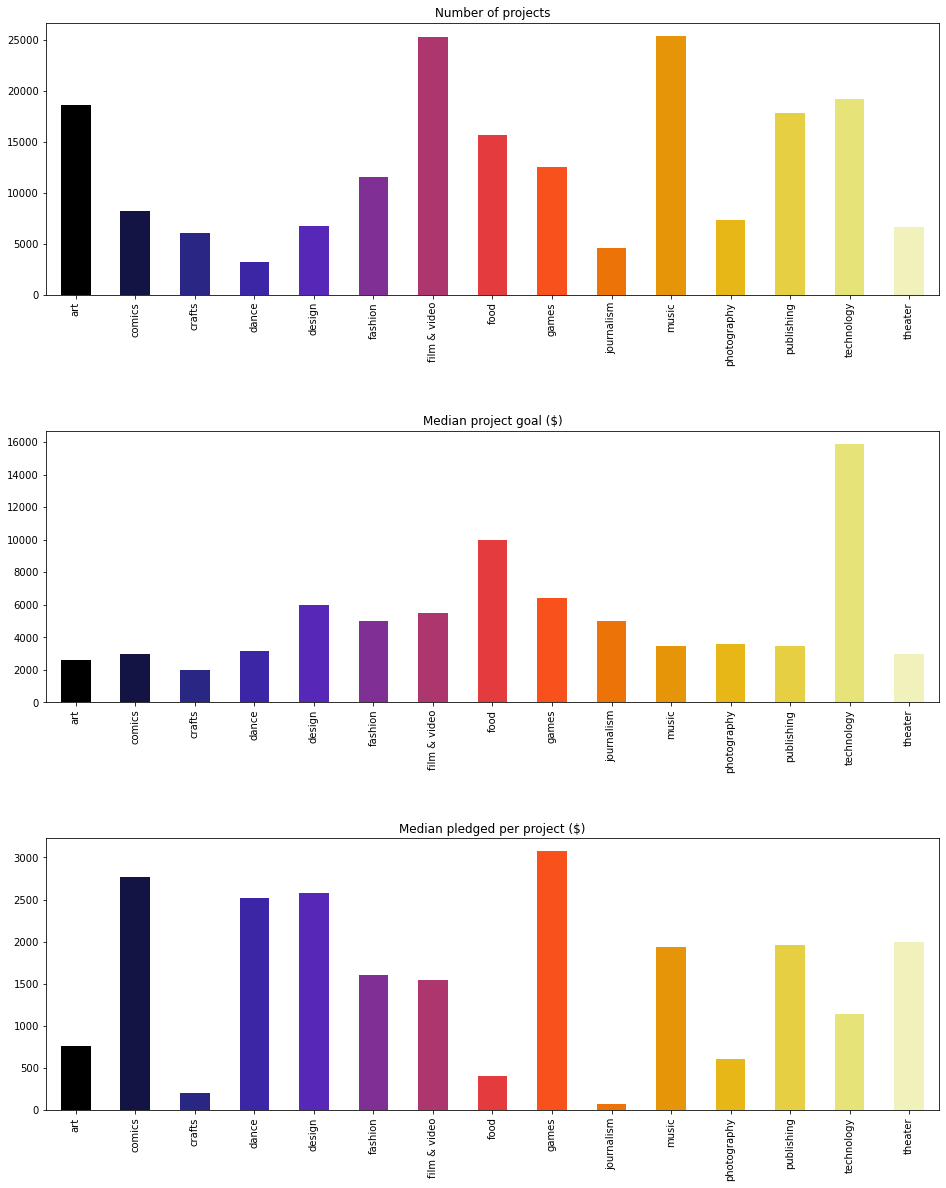

In [43]:
fig, ((ax1, ax2, ax3)) = plt.subplots(3, 1, figsize=(16,20))
color = cm.CMRmap(np.linspace(0, 1, 16,df.category.nunique()))

df.groupby('category').category.count().plot(kind='bar', ax=ax1, color=color)
ax1.set_title('Number of projects')
ax1.set_xlabel('')

df.groupby('category').usd_goal.median().plot(kind='bar', ax=ax2, color=color)
ax2.set_title('Median project goal ($)')
ax2.set_xlabel('')

df.groupby('category').usd_pledged.median().plot(kind='bar', ax=ax3, color=color)
ax3.set_title('Median pledged per project ($)')
ax3.set_xlabel('')

fig.subplots_adjust(hspace=0.5)
plt.show()

The illustrations above aim to highlight the differences among the 15 different categories. Film&Video is the most used category, closely followed by music. Art, publishing and technology take the third place. However, technology has the highest median project goal. Design is the category with the highed pledged amount per project.

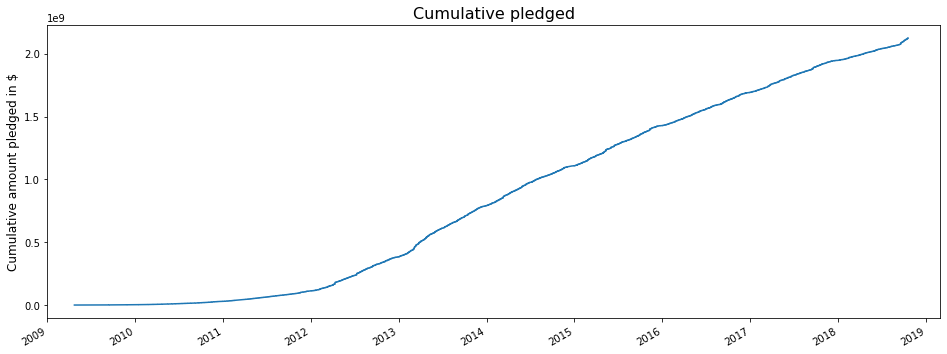

In [44]:
plt.figure(figsize=(16,6))
df.set_index('launched_at').sort_index().usd_pledged.cumsum().plot()
plt.xlim('2009-01-01', '2019-02-28') # Limiting to whole months
plt.xlabel('')
plt.ylabel('Cumulative amount pledged in $', fontsize=12)
plt.title('Cumulative pledged', fontsize=16)
plt.show()

The cumulative pledged figure shows the total of pledged amounts for each year 2009-2019. The trend can be split into two phases, with a change in 2013/2014.

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


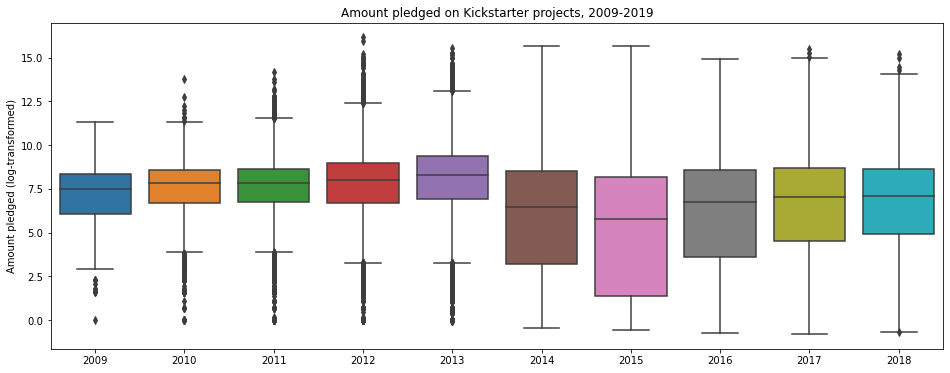

In [45]:
plt.figure(figsize=(16,6))
sns.boxplot(df.launched_at.dt.year, np.log(df.usd_pledged))
plt.xlabel('')
plt.ylabel('Amount pledged (log-transformed)',) #Log-transforming to make the trend clearer, as the distribution is heavily positively skewed
plt.title('Amount pledged on Kickstarter projects, 2009-2019')
plt.show()

Again, the trend can be split into two phases, with a change in 2014. We can see a greater variation in amounts pledged from 2014, with lower median amounts than before 2014, but generally higher mean amounts due to some very large projects.

## NLP 

In [46]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import re
import nltk 
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet 

from sklearn.model_selection import train_test_split

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [47]:
# Create NLP dataset
dataset = pd.read_csv('Cleaned_Kickstarter.csv')
dataset = dataset[dataset.project_status != 'active']
dataset = dataset[dataset.state != 'live']
dataset1 = dataset[['project_id', 'name', 'slug', 'blurb', 'category', 'subcategory', 
                 'country', 'creation_to_launch_days', 'campaign_days', 'launch_day',
                  'deadline_day', 'launch_month', 'deadline_month','usd_goal', 'state']]

# not nation and city because 1292 null values
df_nlp = dataset1.copy()

<AxesSubplot:title={'center':'Frequency of Slug length'}>

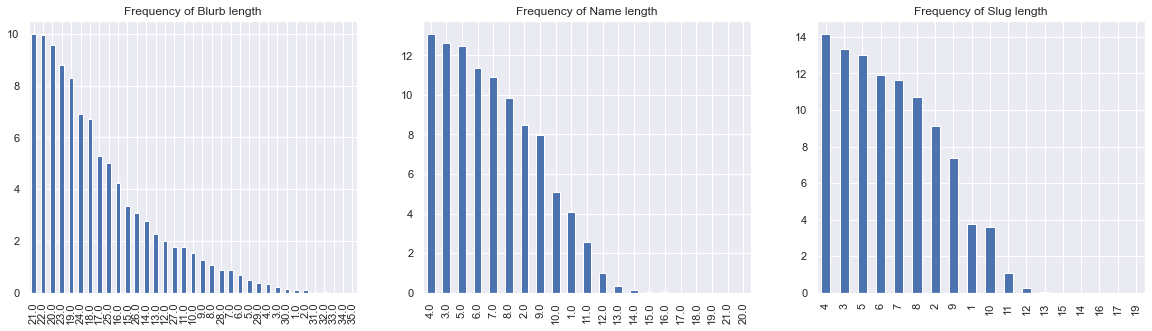

In [48]:
# Text variables length
df_nlp['name_len'] = df_nlp['name'].str.split().str.len()
df_nlp['slug_len'] = df_nlp['slug'].str.split("-").str.len()
df_nlp['blurb_len'] = df_nlp['blurb'].str.split().str.len()

# Frequencies
freq_name = df_nlp['name_len'].value_counts(normalize=True).mul(100)
freq_slug = df_nlp['slug_len'].value_counts(normalize=True).mul(100)
freq_blurb = df_nlp['blurb_len'].value_counts(normalize=True).mul(100)

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20,5))
freq_blurb.plot(ax = axes[0], kind='bar', title = 'Frequency of Blurb length')
freq_name.plot(ax = axes[1], kind='bar', title = 'Frequency of Name length')
freq_slug.plot(ax = axes[2], kind='bar', title = 'Frequency of Slug length')

In [49]:
df_nlp[['name_len', 'slug_len', 'blurb_len']].describe()
df_nlp['state'].value_counts()

# On Average, the length of the name of a project is between 5 and 6 words. Same applies for the slug, which is the set of keywords 
# suggested by the creator. As for blurbs, the average length is 20 words, even if it varies.

successful    78321
failed        74468
canceled       8532
suspended       616
Name: state, dtype: int64

In [50]:
df_nlp[['name_len', 'slug_len', 'blurb_len', 'state']].groupby('state').count()
df_nlp[['name_len', 'slug_len', 'blurb_len', 'state']].describe()

,name_len,slug_len,blurb_len
count,161936.000000,161937.000000,161927.000000
mean,5.667869,5.398964,19.327950
std,2.722273,2.469670,4.927075
min,1.000000,1.000000,1.000000
25%,3.000000,3.000000,17.000000
50%,5.000000,5.000000,20.000000
75%,8.000000,7.000000,23.000000
max,21.000000,19.000000,35.000000


### PREPROCESSING STEPS
In the following code, we will preprocess the text variables: name, slug, blurb. 
We will clean the data following these steps:
- Lowercase 
- Remove extra whitespaces, punctuation special characters and numbers. Here, we assume that non-character words and numbers play a minimal role in prediction. 
- Expansion of the short form definitions
- Lemmatization of the words, to get them into their root words
- Remove Stop Words

In [51]:
# Contraction/Expansion of short words
contractions_dict = {
    'didn\'t': 'did not',
    'don\'t': 'do not',
    "aren't": "are not",
    "can't": "cannot",
    "cant": "cannot",
    "can't've": "cannot have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "didnt": "did not",
    "doesn't": "does not",
    "doesnt": "does not",
    "don't": "do not",
    "dont" : "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he had",
    "he'd've": "he would have",
    "he'll": "he will",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "i'd": "i had",
    "i'd've": "i would have",
    "i'll": "i will",
    "i'm": "i am",
    "im": "i am",
    "i've": "i have",
    "isn't": "is not",
    "it'll": "it will",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she had",
    "she'd've": "she would have",
    "she'll": "she will",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "that's": "that is",
    "there's": "there is",
    "they'd": "they had",
    "they'd've": "they would have",
    "they'll": "they will",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we had",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who's": "who is",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "you'll": "you will",
    "you're": "you are",
    "you've": "you have"
    }

lemmatizer = WordNetLemmatizer()

contractions_re = re.compile('(%s)' % '|'.join(contractions_dict.keys()))

def expand_contractions(s, contractions_dict=contractions_dict):
    def replace(match):
        return contractions_dict[match.group(0)]
    return contractions_re.sub(replace, s)

In [52]:
# Normalize words
def normalize_document(d):
    d = str(d).lower() # lower case
    d = expand_contractions(d) #apply contraction-expansion function
    d = re.sub(r'[^a-zA-Z\s]', '', d, re.I|re.A) # substitute any character that is not a-z or A-Z and remove whitespaces
    d = d.strip()
    tokens = nltk.word_tokenize(d) # tokenize document
    words =[lemmatizer.lemmatize(word) for word in tokens if word not in set(stopwords.words('english'))] # lemmatization
    d = ' '.join(words) 
    return d

df_nlp['blurb_clean'] = df_nlp['blurb'].apply(normalize_document)
df_nlp['name_clean'] = df_nlp['name'].apply(normalize_document)
df_nlp['slug_clean'] = df_nlp['slug'].str.replace("-", " ").apply(normalize_document) 

# Combine text variables
df_nlp['combined_text'] = df_nlp['blurb_clean'] + df_nlp['slug_clean'] + df_nlp['name_clean']

In [53]:
df_nlp.dtypes

project_id                   int64
name                        object
slug                        object
blurb                       object
category                    object
subcategory                 object
country                     object
creation_to_launch_days      int64
campaign_days                int64
launch_day                  object
deadline_day                object
launch_month                object
deadline_month              object
usd_goal                   float64
state                       object
name_len                   float64
slug_len                     int64
blurb_len                  float64
blurb_clean                 object
name_clean                  object
slug_clean                  object
combined_text               object
dtype: object

### Word Cloud

In [54]:
vect = CountVectorizer(max_features=10000)
X = vect.fit_transform(df_nlp['combined_text'].values)

In [55]:
word_cnts = np.asarray(X.sum(axis=0)).ravel().tolist()  # for each word in column, sum all row counts
feature_names = vect.get_feature_names()
word_counts = pd.DataFrame({'word': feature_names, 'count': word_cnts})
word_freq = pd.Series(word_counts['count'])
word_freq.index = word_counts ['word']
text_freq = word_freq.to_dict()
word_counts.sort_values('count', ascending=False)[:20]

,word,count
6079,new,26366
4305,help,19310
628,art,16138
193,album,16098
5960,music,13958
1156,book,13947
7041,project,13419
3518,film,12903
3557,first,12571
5459,make,11244


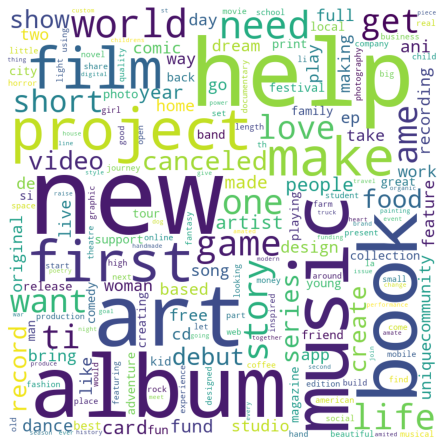

In [56]:
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=800, max_font_size=200, background_color="white").generate_from_frequencies(text_freq)
                    
plt.figure(figsize = (6, 6), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
  
plt.show()

### Topic Modeling and Document Clustering
https://towardsdatascience.com/exploring-textual-data-using-lda-ef1f53c772a4

In [57]:
from sklearn.decomposition import LatentDirichletAllocation
lda = LatentDirichletAllocation(n_components=10, learning_method="batch",
                                max_iter=25, random_state=0)

document_topics = lda.fit_transform(X)

print("lda.components_.shape: {}".format(lda.components_.shape)) #(n_topics, n_words)

lda.components_.shape: (10, 10000)


In [58]:
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()
pyLDAvis.sklearn.prepare(lda, X, vect)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.090065 -0.115618       1        1  13.182589
8     -0.006974 -0.133364       2        1  12.349258
6      0.019475 -0.203729       3        1  11.975038
9     -0.129465 -0.052196       4        1  11.347614
4     -0.018118 -0.130312       5        1  10.213998
7     -0.160716  0.136063       6        1   9.143079
5      0.184279  0.007272       7        1   8.969168
0     -0.203474  0.065538       8        1   8.350387
1     -0.097931  0.236352       9        1   8.153650
2      0.322860  0.189993      10        1   6.315218, topic_info=           Term          Freq         Total Category  logprob  loglift
193       album  15897.000000  15897.000000  Default  30.0000  30.0000
1156       book  14297.000000  14297.000000  Default  29.0000  29.0000
3518       film  12581.000000  12581.000000  Default  28.0000  28.0000
3830       game   9133.000000   9133.000000  Default  27.0000  27.0000
628         art  16127.000000  16127.000000  Default  26.0000  26.0000
...         ...           ...           ...      ...      ...      ...
1714  christmas    685.816894   1116.009164  Topic10  -5.3745   2.2753
6698    picture    721.820608   1340.705902  Topic10  -5.3233   2.1430
5473        man    869.165019   3403.357914  Topic10  -5.1375   1.3972
4206       hard    708.624780   1414.503255  Topic10  -5.3417   2.0710
1866      color    699.505223   1540.890010  Topic10  -5.3547   1.9725

[598 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
57        3  0.998067   acoustic
123       1  0.209041  adventure
123       4  0.096767  adventure
123       7  0.694115  adventure
193       3  0.999923      album
...     ...       ...        ...
9971      2  0.998964      youth
9972      5  0.998445    youtube
9987      7  0.997808       zine
9994      1  0.992164     zombie
9994      4  0.007745     zombie

[1194 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 9, 7, 10, 5, 8, 6, 1, 2, 3])

#### **Model 1.1**: Logistic Regression considering only text and output

In [59]:
# Bag of Words

values = ['canceled', 'suspended']

df_nlp = df_nlp[df_nlp.state.isin(values) == False]

X = df_nlp['combined_text'].values
y = df_nlp["state"].replace({'failed' : 0, 'successful': 1})

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,shuffle=True, random_state=123)


cv = CountVectorizer()
cv_train_features = cv.fit_transform(X_train)

cv_test_features = cv.transform(X_test)

print('Bag of Words model:> Train features shape:', cv_train_features.shape, ' Test features shape:', cv_test_features.shape)

lr = LogisticRegression(penalty='l2', max_iter=500, C=1, solver='lbfgs', random_state=42)
lr.fit(cv_train_features, y_train)


lr_bow_predictions = lr.predict(cv_test_features)

print(classification_report(y_test, lr_bow_predictions))

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Bag of Words model:> Train features shape: (122231, 313394)  Test features shape: (30558, 313394)
              precision    recall  f1-score   support

           0       0.68      0.68      0.68     14895
           1       0.70      0.69      0.69     15663

    accuracy                           0.69     30558
   macro avg       0.69      0.69      0.69     30558
weighted avg       0.69      0.69      0.69     30558



In [60]:
# Tfid
tv = TfidfVectorizer(use_idf=True, min_df=5, max_df=1.0, ngram_range=(1,2),
                     sublinear_tf=True)
tv_train_features = tv.fit_transform(X_train)


tv_test_features = tv.transform(X_test)

print('TFIDF model:> Train features shape:', tv_train_features.shape, ' Test features shape:', tv_test_features.shape)

lr = LogisticRegression(penalty='l2', max_iter=500, C=1, solver='lbfgs', random_state=42)


lr.fit(tv_train_features, y_train)


lr_tfidf_predictions = lr.predict(tv_test_features)

print(classification_report(y_test, lr_tfidf_predictions))

# Tfid performs better than Bag of Words
# (The f-score and precision are good but not enough, potentially indicates 
# that we may not have the volume of data or number of attributes needed in order to make robust predictions.)

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


TFIDF model:> Train features shape: (122231, 45558)  Test features shape: (30558, 45558)
              precision    recall  f1-score   support

           0       0.70      0.69      0.69     14895
           1       0.71      0.72      0.71     15663

    accuracy                           0.70     30558
   macro avg       0.70      0.70      0.70     30558
weighted avg       0.70      0.70      0.70     30558



/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


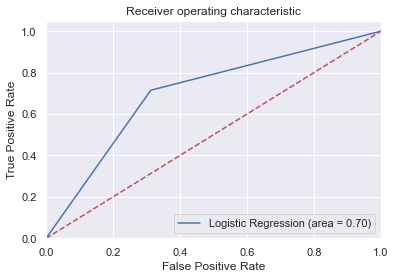

In [61]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, lr_tfidf_predictions)
fpr, tpr, thresholds = roc_curve(y_test, lr_tfidf_predictions)
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [62]:
vect = CountVectorizer().fit(X_train)
feature_names = vect.get_feature_names()
print("Number of features: {}".format(len(feature_names)))

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Number of features: 313394


In [63]:
vect1 = CountVectorizer(min_df=5).fit(X_train)
feature_names1 = vect1.get_feature_names()
print("Number of features: {}".format(len(feature_names)))
print("Ratio number of features: ",len(feature_names1)/len(feature_names)*100, "%")

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Number of features: 313394
Ratio number of features:  5.837699509243955 %


By requiring at least five appearances of each token, we can bring down the number of features to 18295, as seen in the preceding output. Less than 6% of the original amount features.

In [64]:
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
pipe = make_pipeline(TfidfVectorizer(min_df=5, norm=None),
                     LogisticRegression(solver='liblinear'))
param_grid = {'logisticregression__C': [0.001, 0.01, 0.1, 1]}

grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(X_train, y_train)
print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Best parameters: ", grid.best_params_)

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Best cross-validation score: 0.69
Best parameters:  {'logisticregression__C': 0.001}


#### **Model 1.2**: Logistic Regression considering more variables

In [66]:
from sklearn import set_config 

numeric_features =['usd_goal','campaign_days','creation_to_launch_days']
numeric_transformer = Pipeline(steps =[
    ("imputer",SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler())])

#Encode categorical features
cat_features=['category','subcategory', 'country']
categorical_transformer = OneHotEncoder(handle_unknown="ignore")

text_feature = ['combined_text']
#text_transformer = TfidfVectorizer(norm=None)
text_transformer = Pipeline(steps =[
    ("counter",TfidfVectorizer()),
    ("scaler", OneHotEncoder())])
    
#Column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, cat_features),
        ("text",text_transformer, text_feature)])

set_config(display="diagram")

y = df_nlp["state"].replace({'failed' : 0, 'successful': 1})
X = df_nlp[['usd_goal','campaign_days','creation_to_launch_days', 
            'launch_month', 'deadline_month', 'category','subcategory', 
            'country', 'combined_text']]


#X_trans = preprocessor.fit_transform(X)

#X_train, X_test, y_train, y_test = train_test_split(X_trans,y,test_size=0.2,shuffle=True, random_state=123)

#Build Logistic Regression
#clf = LogisticRegression()
#clf.fit(X_train, y_train)

# Making predictions
#y_train_pred = clf.predict(X_train)
#y_test_pred = clf.predict(X_test)

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Feature Selection

In [2]:
df = pd.read_csv("Cleaned_Kickstarter.csv")

In [29]:
#Transform dataset
df_transformed = df.drop(['project_id','nr_backers', 'name', 'slug', 'blurb', 'url', 'is_starrable', 
                            'usd_pledged', 'pledge_per_backer', 'pledged','spotlight','city','subcategory_id', 'created_at', 'launched_at', 'deadline', 'currency', 
                          'current_currency','fx_rate', 'project_status','state_changed_at','disable_communication','is_starrable','nation'], axis=1)

df_transformed=df_transformed.loc[df['state'].isin(["failed","successful"])]
df_transformed=df_transformed.loc[df['project_status'].isin(["inactive"])]

In [30]:
df_transformed.head()

,state,name_len,blurb_len,category,subcategory,country,launch_day,launch_month,creation_to_launch_days,deadline_day,deadline_month,campaign_days,usd_goal,staff_pick
1,failed,5.0,23.0,art,Public Art,US,Thursday,January,7,Thursday,February,14,777.0,False
2,successful,7.0,26.0,journalism,Print,US,Friday,July,5,Sunday,August,30,1000.0,False
3,failed,8.0,19.0,food,Drinks,US,Wednesday,May,0,Friday,June,30,1000.0,False
4,successful,4.0,12.0,film & video,Documentary,US,Tuesday,October,209,Thursday,November,30,25000.0,False
5,failed,2.0,22.0,technology,Apps,US,Thursday,March,5,Saturday,April,30,50000.0,False


In [31]:
df_transformed['staff_pick'] = df_transformed['staff_pick'].astype(str)

In [32]:
#Transform y to 0:1 
df_transformed["state"]=df_transformed["state"].replace({'failed' : 0, 'successful': 1})
df_transformed = pd.get_dummies(df_transformed)

In [33]:
X_unscaled = df_transformed.drop('state', axis=1)
y = df_transformed.state

In [35]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X_unscaled), columns=list(X_unscaled.columns))
X.head()

,name_len,blurb_len,creation_to_launch_days,campaign_days,usd_goal,category_art,category_comics,category_crafts,category_dance,category_design,...,deadline_month_January,deadline_month_July,deadline_month_June,deadline_month_March,deadline_month_May,deadline_month_November,deadline_month_October,deadline_month_September,staff_pick_False,staff_pick_True
0,-0.232661,0.745121,-0.305501,-1.531642,-0.036379,2.935719,-0.196317,-0.180252,-0.138631,-0.180194,...,-0.252245,-0.316091,-0.308848,-0.314963,-0.316229,-0.288582,-0.300653,-0.309141,0.353453,-0.353453
1,0.500356,1.359950,-0.324943,-0.291032,-0.036183,-0.340632,-0.196317,-0.180252,-0.138631,-0.180194,...,-0.252245,-0.316091,-0.308848,-0.314963,-0.316229,-0.288582,-0.300653,-0.309141,0.353453,-0.353453
2,0.866864,-0.074651,-0.373550,-0.291032,-0.036183,-0.340632,-0.196317,-0.180252,-0.138631,-0.180194,...,-0.252245,-0.316091,3.237835,-0.314963,-0.316229,-0.288582,-0.300653,-0.309141,0.353453,-0.353453
3,-0.599169,-1.509253,1.658212,-0.291032,-0.015120,-0.340632,-0.196317,-0.180252,-0.138631,-0.180194,...,-0.252245,-0.316091,-0.308848,-0.314963,-0.316229,3.465220,-0.300653,-0.309141,0.353453,-0.353453
4,-1.332185,0.540178,-0.324943,-0.291032,0.006822,-0.340632,-0.196317,-0.180252,-0.138631,-0.180194,...,-0.252245,-0.316091,-0.308848,-0.314963,-0.316229,-0.288582,-0.300653,-0.309141,0.353453,-0.353453


In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,shuffle=True, random_state=123)

# Modeling
## Overview

1. LOGISTIC REGRESSION: Logistic regression as a binary classifier in order to predict which of two categories a data point falls in to. Probability it will successful or not
2. MULTI LINEAR REGRESSION: What can be the funding goal for this project based on the range of prices for this category/subtopic? Help creators to set a feasible goal 
2. LOGISTIC REGRESSION multiclass classification: Level based on pledged amount. Which variables are more correlated with price? A, B, C, D, E based on pledged amount - funding goal
3. LOGISTIC REGRESSION WITH PCA (Domi): As the dataset hast a lot of features, we can usa PCA and reduce it to fewer features which still explain the variation --> model fitting / accuracy can be improved herewith confusion matrix and classification for using the best parameters
4. RANDOM FOREST (Maria and Eugenia)

### 1. Logistic Regression
For our dummy model we train a classification model with several numeric and categorical features of completed projects to get an estimation whether the model would generally be able to predict the success of a project.

Numeric features: 
- Nr of Backers
- Goal

Categorical features:
- Category
- Subcategory
- Country 
- Nation
- spotlight
- staff_pick

Target variable: 
- state

In [9]:
#Imports
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn import set_config 
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
import warnings
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV

warnings.filterwarnings('ignore')

In [ ]:
#Transform dataset
df_dummy=df

df_dummy=df_dummy.loc[df['state'].isin(["failed","successful"])]
df_dummy=df_dummy.loc[df['project_status'].isin(["inactive"])]

#Drop unused columns
del_col=['project_id', 'name', 'slug', 'blurb', 'url', 'subcategory_id', 'created_at', 'launched_at', 'deadline','pledged', 'currency', 'usd_pledged', 'current_currency',
        'fx_rate', 'project_status','state_changed_at',
        'disable_communication','is_starrable']

df_dummy=df_dummy.drop(del_col, axis = 1)

#Transform y to 0:1 
y=df_dummy["state"].replace({'failed' : 0, 'successful': 1})

X=df_dummy
X=X.drop('state', axis = 1)

In [ ]:
df_dummy

#### Trial #1

In [ ]:
#Build preprocessor for columns
#Standardize numerical features
numeric_features=["nr_backers", "usd_goal"]
numeric_transformer = Pipeline(steps =[
    ("imputer",SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler())])

#Encode categorical features
cat_features=["category", "subcategory", "country", "nation", "spotlight", "staff_pick"]
categorical_transformer = OneHotEncoder(handle_unknown="ignore")

#Column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, cat_features)])

set_config(display="diagram")

#Run Column Transformer
X_trans = preprocessor.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_trans,y,test_size=0.2,shuffle=True, random_state=123)

#Build Logistic Regression
clf = LogisticRegression()
clf.fit(X_train, y_train)

# Making predictions
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

In [ ]:
#Build preprocessor for columns
#Standardize numerical features
numeric_features=[ "usd_goal"]
numeric_transformer = Pipeline(steps =[
    ("imputer",SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler())])

#Encode categorical features
cat_features=["category", "subcategory", "country", "nation", "staff_pick"]
categorical_transformer = OneHotEncoder(handle_unknown="ignore")

#Column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, cat_features)])

set_config(display="diagram")

#Run Column Transformer
X_trans = preprocessor.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_trans,y,test_size=0.2,shuffle=True, random_state=123)


#### Evaluation #1

In [ ]:
# Logistic regression scores
print("Logistic regression score for training set:", round(clf.score(X_train, y_train),5))
print("Logistic regression score for test set:", round(clf.score(X_test, y_test),5))
print("\nClassification report:")
print(classification_report(y_test, y_test_pred))

The performance metrics are  extremely high and decribe a perfect model. This is mainly because  the feature "spotlight" is perfectly correlated to the target variable. In the following trial we will evaluate the model without this feature. Nonetheless, "spotlight" is an important variable that needs further analysis. 

#### Trial #2

In [ ]:
#Build preprocessor for columns
#Standardize numerical features
numeric_features=["nr_backers", "usd_goal"]
numeric_transformer = Pipeline(steps =[
    ("imputer",SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler())])

#Encode categorical features
cat_features=["category", "subcategory", "nation", "staff_pick"]
categorical_transformer = OneHotEncoder(sparse = False, handle_unknown="ignore")

#Column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, cat_features)])

set_config(display="diagram")

#Run Column Transformer
X_trans = preprocessor.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_trans,y,test_size=0.2,shuffle=True, random_state=123)

#Build Logistic Regression
clf = LogisticRegression()
clf.fit(X_train, y_train)

# Making predictions
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

#### Evaluation #2

In [ ]:
# Logistic regression scores
print("Logistic regression score for training set:", round(clf.score(X_train, y_train),5))
print("Logistic regression score for test set:", round(clf.score(X_test, y_test),5))
print("\nClassification report:")
print(classification_report(y_test, y_test_pred))

## Feature Selection

**Feature Selection with Variance Threshold**

In this part we're optimizing our model through feature selection with a variance threshold. Thus, we're testing the model for 
multiple thresholds to decide which threshold provides us with the highest weighted F1 score. Since our data set is balanced and we're aiming for a good overall classification of samples we're relying on the weighted F1-score to correctly represent the proportion of each class’s support relative to the sum of all support values. 

In [ ]:
def opt_variance_threshold(X, preprocessor, varthresh):
    X_trans = preprocessor.fit_transform(X)

    #Variance Threshold
    sel = VarianceThreshold(threshold = (varthresh*(1-varthresh)))
    X_trans_sel=pd.DataFrame(X_trans)
    X_trans_sel=sel.fit_transform(X_trans_sel)

    #Train test split
    X_train, X_test, y_train, y_test = train_test_split(X_trans_sel,y,test_size=0.2,shuffle=True, random_state=123)

    #Build Logistic Regression
    clf = LogisticRegression()
    clf.fit(X_train, y_train)

    # Making predictions
    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)

    # Logistic regression scores
    scores={"Variance Threshold": varthresh, "Train Score":round(clf.score(X_train, y_train),8), 
            "Test Score":round(clf.score(X_test, y_test),8), 
            "F1-Score Train":round(f1_score(y_train, y_train_pred, average='weighted'),8),
            "F1 Score Test":round(f1_score(y_test, y_test_pred, average='weighted'),8)}
    scores=pd.DataFrame(data=scores, index=[varthresh])
    return scores

scoring= pd.DataFrame(columns = ["Variance Threshold", "Train Score", "Test Score"])

#Iterate thresholds
for j in np.arange(0.8,1,0.01):
    xx=opt_variance_threshold(X, preprocessor, j)
    scoring=pd.concat([scoring,xx], axis=0)

#Select optimal threshold
opt_thresh=scoring['F1 Score Test'].idxmax().round(2)
print("Optimal threshold for max f1-score test set: "+str(opt_thresh))

#### Hyperparameter Tuning Logistic Regression using GridSearch
In this part we're tuning the hyperparameter using cross-validated GridSearch with our optimized Variance Threshold#Te. We're optimizing the C-Value as the main hyperparameter of the regression, the penalty of the loss function, as well as the solver itself. The results will be tested against the F1 score, as in the previous feature selection. 

In [ ]:
def grid_search(X, preprocessor, vt_opt):
    X_trans = preprocessor.fit_transform(X)

    #Variance Threshold
    sel = VarianceThreshold(threshold = (vt_opt*(1-vt_opt)))
    X_trans_sel=pd.DataFrame(X_trans)
    X_trans_sel=sel.fit_transform(X_trans_sel)

    #Train test split
    X_train, X_test, y_train, y_test = train_test_split(X_trans_sel,y,test_size=0.2,shuffle=True, random_state=123)

    grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"], "solver": ['newton-cg', 'lbfgs', 'liblinear']}
    
    logreg=LogisticRegression()
    logreg_cv=GridSearchCV(logreg,grid,cv=3, scoring ="f1")
    logreg_cv.fit(X_train,y_train)

    print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
    
    return logreg_cv.best_params_

check=grid_search(X, preprocessor, opt_thresh)

opt_hyper=int(check["C"])
opt_regularization=str(check["penalty"])
opt_solver=str(check["solver"])

In [ ]:
#Testing:
def test_model(X, preprocessor, vt_opt, opt_hyper, opt_regularization, opt_solver):
    X_trans = preprocessor.fit_transform(X)

    #Optimal Variance Threshold
    sel = VarianceThreshold(threshold = (vt_opt*(1-vt_opt)))
    X_trans_sel=pd.DataFrame(X_trans)
    X_trans_sel=sel.fit_transform(X_trans_sel)

    #Train test split
    X_train, X_test, y_train, y_test = train_test_split(X_trans_sel,y,test_size=0.2,shuffle=True, random_state=123)
    
    #LogReg with optimal parameters
    clf=LogisticRegressionCV(cv=5, Cs=opt_hyper, solver=opt_solver, penalty=opt_regularization)
    clf.fit(X_train,y_train)
    
    # Making predictions
    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)
    
    #Scoring
    print("F1-Score Train"+ str(round(f1_score(y_train, y_train_pred, average='weighted'),8)))
    print("F1 Score Test"+str(round(f1_score(y_test, y_test_pred, average='weighted'),8)))
    
    return #F1 Score
    
opt_hyper=int(check["C"])
test_model(X,preprocessor, opt_thresh, opt_hyper, opt_regularization, opt_solver)

## Interpretation:
xxx

xxx

**To Do's**
- Feature selection: Welche features sollten ins Modell mitaufgenommen werden und welche nicht? --> **FEATURE ENGINEERING AND FEATURE SELECTION**

**Feature Engineering**
Cat features:
--> Ordinal Encoder vs One-Hot Encoder?
--> Sparse representation when many unique categorical features

Numeric features:
- Counting 
- Rounding
- Binning / Discretization (Könnte gut sein)
- Statistical transformations: LogTransformation; Box-Cox Transformation (Könnte gut sein)
- Scaling: Bring all values to a scale from 0 to 1 
- Normalization: All samples have a unit form

Feature cross: 
A feature cross is a synthetic feature that encodes nonlinearity in the feature space by multiplying two or more input features

Engineering: 
created_at: when the project has been created - yyyy/mm/dd.
launched_at: launch date of the project - yyyy/mm/dd.
deadline: deadline of the project - yyyy/mm/dd.

- Campaign length — number of days from launch to deadline: DEADLINE - LAUNCH DATE
- Number of days from page creation to project launch: LAUNCH DATE - CREATION DATE
- Name: Word length
- Blurb: Word length

Opt: 
- Month of launch
- Month of deadline
- Day of launch
- Day of deadline
- Two hour window of launch
- Two hour window of deadline

**Feature Selection**
Avoid rarely used discrete feature values
1. Variance Threshold -> Opt Threshold bei 0.96
2. Recursive Feature Elimination
3. SelectFromModel

Coefficients abgleichen für jedes Feature

Features:
Numeric:
    Goal: Sinnvoll
    Number of backers: Sinvoll
    
Cat:
    Category:
    Subcategory:
    Country: 
    Nation: Macht keinen sinn
    Staff pick: Sinnvoll 

- Confusion Matrix
- ROC und AUC curves für bessere Beurteilung (LogLoss??)
- Kann F1 Score als zentrale Metrik genommen werden? (Es ist nicht eindeutig ob True False oder False True schlimmer ist)
- 205k Samples insgesamt --> SGD classifier for large datasets >100K samples

In [ ]:
df.head()

### 4. Logistic Regression with PCA
The dependent (y) and independent (X) features will be separated into separate datasets. Because the features are on different scales, independent features will be transformed and normalised using StandardScaler.

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, f1_score, precision_recall_fscore_support
import itertools


In [ ]:
# Fitting a logistic regression model with default parameters
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train,y_train)

# Making predictions
y_hat_train = logistic_regression.predict(X_train)
y_hat_test = logistic_regression.predict(X_test)
# Logistic regression scores
print("Log Reg score, training set:", round(logistic_regression.score(X_train, y_train),5))
print("Log Reg score, test set:", round(logistic_regression.score(X_test, y_test),5))
print("\nClassification report:")
print(classification_report(y_test, y_hat_test))

In [ ]:
def plot_cf(y_true, y_pred, class_names=None, model_name=None):
    cf = confusion_matrix(y_true, y_pred)
    plt.imshow(cf, cmap=plt.cm.Blues)
    plt.grid(b=None)
    if model_name:
        plt.title("Confusion Matrix: {}".format(model_name))
    else:
        plt.title("Confusion Matrix")
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    
    class_names = set(y_true)
    tick_marks = np.arange(len(class_names))
    if class_names:
        plt.xticks(tick_marks, class_names)
        plt.yticks(tick_marks, class_names)
    
    thresh = cf.max() / 2.
    
    for i, j in itertools.product(range(cf.shape[0]), range(cf.shape[1])):
        plt.text(j, i, cf[i, j], horizontalalignment='center', color='white' if cf[i, j] > thresh else 'black')

    plt.colorbar()

In [ ]:
plot_cf(y_test, y_hat_test)

In [ ]:
# Plotting the AUC-ROC
y_score = logreg.fit(X_train, y_train).decision_function(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_score)

print('AUC:', round(auc(fpr, tpr),5))

plt.figure(figsize=(10,8))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
df_transformed = df.drop(["pledge_per_backer","name","slug","blurb","nation","city","creator_id","creator_name","is_creator_registered","url","subcategory_id",'nr_backers', 'created_at', 'deadline', 'is_starrable', 'launched_at', 'usd_pledged', 'subcategory', "pledged","currency","current_currency","fx_rate", "project_status", "state_changed_at", "disable_communication","spotlight"], axis=1)
df_transformed = df_transformed.set_index('project_id')

In [ ]:
df_transformed['state'] = df_transformed['state'].replace({'failed': 0, 'successful': 1})

In [ ]:
df_transformed['staff_pick'] = df_transformed['staff_pick'].astype(str)

In [ ]:
df_transformed

In [ ]:
df_transformed = pd.get_dummies(df_transformed)

In [ ]:
X_unscaled = df_transformed.drop(['state_0','state_1'],axis=1)
y = df_transformed.state_0

In [ ]:
# Transforming the data
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X_unscaled), columns=list(X_unscaled.columns))
X.head()

In [ ]:
# Fitting
pca = PCA()
pca.fit_transform(X)
explained_var = np.cumsum(pca.explained_variance_ratio_)

# Plotting the amount of variation explained by PCA with different numbers of components
plt.figure(figsize=(16,6))
plt.plot(list(range(1, len(explained_var)+1)), explained_var)
plt.title('Amount of variation explained by PCA', fontsize=14)
plt.xlabel('Number of components')
plt.ylabel('Explained variance');

The figure aboves explains that the highest number of components is 72

In [ ]:
print("80% of variance explained with", np.where(explained_var > 0.8)[0][0], "components")
print("90% of variance explained with", np.where(explained_var > 0.9)[0][0], "components")
print("80% of variance explained with", np.where(explained_var > 0.99)[0][0], "components")

The results indiciate that the score is highest for 72 components, however the difference is small >1% improvement from 50 components

In [ ]:
n_comps = [50,59,72]
for n in n_comps:
    pipe = Pipeline([('pca', PCA(n_components=n)), ('clf', LogisticRegression())])
    pipe.fit(X_train, y_train)
    print("\nNumber of components:", n)
    print("Score:", round(pipe.score(X_test, y_test),5))

In [ ]:
pca = PCA(n_components=72)
pca.fit_transform(X)

# Set components as columns and features as rows
pca_72_components = pd.DataFrame(pca.components_,columns=X.columns).T
pca_72_components['mean_weight'] = pca_72_components.iloc[:].abs().mean(axis=1)
pca_72_components.sort_values('mean_weight', ascending=False)

Below you can see the average weight of each feature on each component. We can see that the average weight of how much each feature is included in each component is pretty similar.

In [ ]:
# Plotting feature importances
plt.figure(figsize=(20,5))
pca_72_components.mean_weight.sort_values(ascending=False).plot(kind='bar')
plt.show()

These are the top 5 most important features in the top three most important components

In [ ]:
pca_72_components[0].map(lambda x : x).abs().sort_values(ascending = False)[:5]

In [ ]:
pca_72_components[1].map(lambda x : x).abs().sort_values(ascending = False)[:5]

In [ ]:
pca_72_components[2].map(lambda x : x).abs().sort_values(ascending = False)[:5]

### 5. Random Forest

In [ ]:
>>> conda install transformers

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn import set_config
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_cf(y_true, y_pred, class_names=None, model_name=None):
    """Plots a confusion matrix"""
    cf = confusion_matrix(y_true, y_pred)
    plt.imshow(cf, cmap=plt.cm.Greens)
    plt.grid(b=None)
    if model_name:
        plt.title("Confusion Matrix: {}".format(model_name))
    else:
        plt.title("Confusion Matrix")
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    
    class_names = set(y_true)
    tick_marks = np.arange(len(class_names))
    if class_names:
        plt.xticks(tick_marks, class_names)
        plt.yticks(tick_marks, class_names)
    
    thresh = cf.max() / 2.
    
    for i, j in itertools.product(range(cf.shape[0]), range(cf.shape[1])):
        plt.text(j, i, cf[i, j], horizontalalignment='center', color='white' if cf[i, j] > thresh else 'black')

    plt.colorbar()

In [ ]:
from sklearn.metrics import accuracy_score, auc, classification_report
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42)

rnd_clf.fit(X_train, y_train)
y_pred = rnd_clf.predict(X_test)

print("\nAccuracy score:")
print(accuracy_score(y_test, y_pred))
print("\nClassification report:")
print(classification_report(y_test, y_pred))



plot_cf(y_test, y_pred)

In [ ]:
feat_imp=[]
for name, score in zip(X, rnd_clf.feature_importances_):
    feat_imp.append((name, score))

In [ ]:
df_feat_imp = pd.DataFrame(feat_imp, columns=['Features','Importance'])
top_feat_imp = df_feat_imp.sort_values(by=['Importance'], ascending=False).head(20)
top_feat_imp

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.barplot(x=top_feat_imp.Importance, y=top_feat_imp.Features)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

In [ ]:
# New random forest with only the two most important variables
rf_most_important = RandomForestClassifier(n_estimators= 100, random_state=42)

X_train_imp = X_train[['usd_goal','creation_to_launch_days','blurb_len','name_len','campaign_days','staff_pick_True', 'staff_pick_False']]
X_test_imp = X_test[['usd_goal','creation_to_launch_days','blurb_len','name_len','campaign_days','staff_pick_True', 'staff_pick_False']]


rf_most_important.fit(X_train_imp, y_train)
predictions = rf_most_important.predict(X_test_imp)

print("\nAccuracy score:")
print(accuracy_score(y_test, predictions))
print("\nClassification report:")
print(classification_report(y_test, predictions))


plot_cf(y_test, predictions)

In [ ]:
# Using GridSearchCV to test multiple different parameters
import time
from sklearn.model_selection import GridSearchCV

rf_start = time.time()

rnd_clf = RandomForestClassifier()

params_rf = {'n_estimators': [100, 200, 400],
             'max_depth': [20, 30, 40],
             'min_samples_split':[0.001, 0.01]}

grid_rf = GridSearchCV(estimator = RandomForestClassifier(), param_grid = params_rf, cv=5)

grid_rf.fit(X_train, y_train)

rf_end = time.time()

rf_best_score = grid_rf.best_score_
rf_best_params = grid_rf.best_params_

print(f"Time taken to run: {round((rf_end - rf_start)/60,1)} minutes")
print("Best accuracy:", round(rf_best_score,2))
print("Best parameters:", rf_best_params)

In [ ]:
from sklearn.model_selection import validation_curve
train_scoreNum, test_scoreNum = validation_curve(
                                RandomForestClassifier(),
                                X = X_train, y = y_train, 
                                param_name = 'n_estimators', 
                                param_range = [100, 300, 500, 750, 800, 1200], cv = 3)

### XGBoost

In [38]:
import xgboost as xgb

xgb_clf = xgb.XGBClassifier()
xgb_clf.fit(X_train, y_train)

print("Score:", round(xgb_clf.score(X_test, y_test),5))

/Users/moritzhackel/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:11:08] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Score: 0.81907


In [43]:
#add time needed to run
import time


from sklearn.model_selection import GridSearchCV

start_time = time.time()

xgb_clf = xgb.XGBClassifier()

params_xgb = [ 
  {'clf__n_estimators': [100],
   'clf__max_depth': [25, 35],
   'clf__learning_rate': [0.01, 0.1],
   'clf__subsample': [0.7, 1],
   'clf__min_child_weight': [20, 100]
  }
]

grid_xgb = GridSearchCV(estimator=xgb_clf,
                  param_grid=params_xgb,
                  cv=5, scoring='f1_weighted')

grid_xgb.fit(X_train, y_train)

end_time = time.time()                     

xgb_best_params = grid_xgb.best_params_

print('Best parameters:', xgb_best_params)
print(f'Time to run the Gridsearch: {round((end_time - start_time)/60,1)} min' )

/Users/moritzhackel/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:44:01] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:576: 
Parameters: { "clf__learning_rate", "clf__max_depth", "clf__min_child_weight", "clf__n_estimators", "clf__subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:44:01] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/moritzhackel/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:44:21] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:576: 
Parameters: { "clf__learning_rate", "clf__max_depth", "clf__min_child_weight", "clf__n_estimators", "clf__subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:44:22] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/moritzhackel/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:44:42] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:576: 
Parameters: { "clf__learning_rate", "clf__max_depth", "clf__min_child_weight", "clf__n_estimators", "clf__subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:44:43] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/moritzhackel/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:45:05] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:576: 
Parameters: { "clf__learning_rate", "clf__max_depth", "clf__min_child_weight", "clf__n_estimators", "clf__subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:45:05] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/moritzhackel/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:45:28] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:576: 
Parameters: { "clf__learning_rate", "clf__max_depth", "clf__min_child_weight", "clf__n_estimators", "clf__subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:45:28] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/moritzhackel/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:45:51] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:576: 
Parameters: { "clf__learning_rate", "clf__max_depth", "clf__min_child_weight", "clf__n_estimators", "clf__subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:45:51] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/moritzhackel/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:46:15] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:576: 
Parameters: { "clf__learning_rate", "clf__max_depth", "clf__min_child_weight", "clf__n_estimators", "clf__subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:46:15] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/moritzhackel/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:46:40] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:576: 
Parameters: { "clf__learning_rate", "clf__max_depth", "clf__min_child_weight", "clf__n_estimators", "clf__subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:46:40] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/moritzhackel/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:47:04] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:576: 
Parameters: { "clf__learning_rate", "clf__max_depth", "clf__min_child_weight", "clf__n_estimators", "clf__subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:47:05] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/moritzhackel/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:47:29] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:576: 
Parameters: { "clf__learning_rate", "clf__max_depth", "clf__min_child_weight", "clf__n_estimators", "clf__subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:47:29] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/moritzhackel/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:47:54] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:576: 
Parameters: { "clf__learning_rate", "clf__max_depth", "clf__min_child_weight", "clf__n_estimators", "clf__subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:47:54] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/moritzhackel/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:48:19] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:576: 
Parameters: { "clf__learning_rate", "clf__max_depth", "clf__min_child_weight", "clf__n_estimators", "clf__subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:48:20] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/moritzhackel/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:48:44] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:576: 
Parameters: { "clf__learning_rate", "clf__max_depth", "clf__min_child_weight", "clf__n_estimators", "clf__subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:48:45] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/moritzhackel/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:49:10] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:576: 
Parameters: { "clf__learning_rate", "clf__max_depth", "clf__min_child_weight", "clf__n_estimators", "clf__subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:49:10] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/moritzhackel/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:49:35] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:576: 
Parameters: { "clf__learning_rate", "clf__max_depth", "clf__min_child_weight", "clf__n_estimators", "clf__subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:49:35] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/moritzhackel/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:50:00] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:576: 
Parameters: { "clf__learning_rate", "clf__max_depth", "clf__min_child_weight", "clf__n_estimators", "clf__subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:50:01] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/moritzhackel/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:50:26] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:576: 
Parameters: { "clf__learning_rate", "clf__max_depth", "clf__min_child_weight", "clf__n_estimators", "clf__subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:50:26] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/moritzhackel/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:50:52] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:576: 
Parameters: { "clf__learning_rate", "clf__max_depth", "clf__min_child_weight", "clf__n_estimators", "clf__subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:50:52] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/moritzhackel/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:51:17] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:576: 
Parameters: { "clf__learning_rate", "clf__max_depth", "clf__min_child_weight", "clf__n_estimators", "clf__subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:51:18] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/moritzhackel/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:51:44] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:576: 
Parameters: { "clf__learning_rate", "clf__max_depth", "clf__min_child_weight", "clf__n_estimators", "clf__subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:51:45] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/moritzhackel/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:52:10] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:576: 
Parameters: { "clf__learning_rate", "clf__max_depth", "clf__min_child_weight", "clf__n_estimators", "clf__subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:52:11] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/moritzhackel/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:52:37] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:576: 
Parameters: { "clf__learning_rate", "clf__max_depth", "clf__min_child_weight", "clf__n_estimators", "clf__subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:52:37] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/moritzhackel/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:53:03] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:576: 
Parameters: { "clf__learning_rate", "clf__max_depth", "clf__min_child_weight", "clf__n_estimators", "clf__subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:53:03] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/moritzhackel/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:53:29] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:576: 
Parameters: { "clf__learning_rate", "clf__max_depth", "clf__min_child_weight", "clf__n_estimators", "clf__subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:53:29] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/moritzhackel/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:53:55] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:576: 
Parameters: { "clf__learning_rate", "clf__max_depth", "clf__min_child_weight", "clf__n_estimators", "clf__subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:53:56] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/moritzhackel/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:54:22] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:576: 
Parameters: { "clf__learning_rate", "clf__max_depth", "clf__min_child_weight", "clf__n_estimators", "clf__subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:54:22] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/moritzhackel/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:54:48] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:576: 
Parameters: { "clf__learning_rate", "clf__max_depth", "clf__min_child_weight", "clf__n_estimators", "clf__subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:54:49] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/moritzhackel/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:55:14] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:576: 
Parameters: { "clf__learning_rate", "clf__max_depth", "clf__min_child_weight", "clf__n_estimators", "clf__subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:55:15] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/moritzhackel/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:55:41] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:576: 
Parameters: { "clf__learning_rate", "clf__max_depth", "clf__min_child_weight", "clf__n_estimators", "clf__subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:55:42] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/moritzhackel/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:56:09] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:576: 
Parameters: { "clf__learning_rate", "clf__max_depth", "clf__min_child_weight", "clf__n_estimators", "clf__subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:56:09] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/moritzhackel/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:56:35] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:576: 
Parameters: { "clf__learning_rate", "clf__max_depth", "clf__min_child_weight", "clf__n_estimators", "clf__subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:56:35] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/moritzhackel/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:57:02] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:576: 
Parameters: { "clf__learning_rate", "clf__max_depth", "clf__min_child_weight", "clf__n_estimators", "clf__subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:57:02] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/moritzhackel/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:57:28] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:576: 
Parameters: { "clf__learning_rate", "clf__max_depth", "clf__min_child_weight", "clf__n_estimators", "clf__subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:57:29] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/moritzhackel/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:57:54] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:576: 
Parameters: { "clf__learning_rate", "clf__max_depth", "clf__min_child_weight", "clf__n_estimators", "clf__subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:57:55] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/moritzhackel/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:58:21] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:576: 
Parameters: { "clf__learning_rate", "clf__max_depth", "clf__min_child_weight", "clf__n_estimators", "clf__subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:58:22] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/moritzhackel/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:58:48] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:576: 
Parameters: { "clf__learning_rate", "clf__max_depth", "clf__min_child_weight", "clf__n_estimators", "clf__subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:58:48] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/moritzhackel/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:59:15] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:576: 
Parameters: { "clf__learning_rate", "clf__max_depth", "clf__min_child_weight", "clf__n_estimators", "clf__subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:59:16] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/moritzhackel/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:59:42] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:576: 
Parameters: { "clf__learning_rate", "clf__max_depth", "clf__min_child_weight", "clf__n_estimators", "clf__subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:59:42] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/moritzhackel/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:00:09] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:576: 
Parameters: { "clf__learning_rate", "clf__max_depth", "clf__min_child_weight", "clf__n_estimators", "clf__subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[18:00:10] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/moritzhackel/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:00:37] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:576: 
Parameters: { "clf__learning_rate", "clf__max_depth", "clf__min_child_weight", "clf__n_estimators", "clf__subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[18:00:37] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/moritzhackel/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:01:04] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:576: 
Parameters: { "clf__learning_rate", "clf__max_depth", "clf__min_child_weight", "clf__n_estimators", "clf__subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[18:01:05] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/moritzhackel/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:01:33] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:576: 
Parameters: { "clf__learning_rate", "clf__max_depth", "clf__min_child_weight", "clf__n_estimators", "clf__subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[18:01:33] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/moritzhackel/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:02:01] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:576: 
Parameters: { "clf__learning_rate", "clf__max_depth", "clf__min_child_weight", "clf__n_estimators", "clf__subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[18:02:01] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/moritzhackel/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:02:29] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:576: 
Parameters: { "clf__learning_rate", "clf__max_depth", "clf__min_child_weight", "clf__n_estimators", "clf__subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[18:02:30] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/moritzhackel/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:02:58] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:576: 
Parameters: { "clf__learning_rate", "clf__max_depth", "clf__min_child_weight", "clf__n_estimators", "clf__subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[18:02:58] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/moritzhackel/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:03:26] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:576: 
Parameters: { "clf__learning_rate", "clf__max_depth", "clf__min_child_weight", "clf__n_estimators", "clf__subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[18:03:27] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/moritzhackel/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:03:54] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:576: 
Parameters: { "clf__learning_rate", "clf__max_depth", "clf__min_child_weight", "clf__n_estimators", "clf__subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[18:03:54] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/moritzhackel/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:04:22] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:576: 
Parameters: { "clf__learning_rate", "clf__max_depth", "clf__min_child_weight", "clf__n_estimators", "clf__subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[18:04:22] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/moritzhackel/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:04:50] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:576: 
Parameters: { "clf__learning_rate", "clf__max_depth", "clf__min_child_weight", "clf__n_estimators", "clf__subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[18:04:50] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/moritzhackel/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:05:17] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:576: 
Parameters: { "clf__learning_rate", "clf__max_depth", "clf__min_child_weight", "clf__n_estimators", "clf__subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[18:05:17] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/moritzhackel/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:05:44] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:576: 
Parameters: { "clf__learning_rate", "clf__max_depth", "clf__min_child_weight", "clf__n_estimators", "clf__subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[18:05:44] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/moritzhackel/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:06:12] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:576: 
Parameters: { "clf__learning_rate", "clf__max_depth", "clf__min_child_weight", "clf__n_estimators", "clf__subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[18:06:12] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/moritzhackel/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:06:39] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:576: 
Parameters: { "clf__learning_rate", "clf__max_depth", "clf__min_child_weight", "clf__n_estimators", "clf__subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[18:06:39] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/moritzhackel/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:07:06] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:576: 
Parameters: { "clf__learning_rate", "clf__max_depth", "clf__min_child_weight", "clf__n_estimators", "clf__subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[18:07:06] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/moritzhackel/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:07:33] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:576: 
Parameters: { "clf__learning_rate", "clf__max_depth", "clf__min_child_weight", "clf__n_estimators", "clf__subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[18:07:33] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/moritzhackel/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:08:00] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:576: 
Parameters: { "clf__learning_rate", "clf__max_depth", "clf__min_child_weight", "clf__n_estimators", "clf__subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[18:08:00] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/moritzhackel/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:08:27] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:576: 
Parameters: { "clf__learning_rate", "clf__max_depth", "clf__min_child_weight", "clf__n_estimators", "clf__subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[18:08:27] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/moritzhackel/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:08:54] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:576: 
Parameters: { "clf__learning_rate", "clf__max_depth", "clf__min_child_weight", "clf__n_estimators", "clf__subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[18:08:54] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/moritzhackel/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:09:21] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:576: 
Parameters: { "clf__learning_rate", "clf__max_depth", "clf__min_child_weight", "clf__n_estimators", "clf__subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[18:09:21] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/moritzhackel/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:09:48] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:576: 
Parameters: { "clf__learning_rate", "clf__max_depth", "clf__min_child_weight", "clf__n_estimators", "clf__subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[18:09:48] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/moritzhackel/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:10:15] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:576: 
Parameters: { "clf__learning_rate", "clf__max_depth", "clf__min_child_weight", "clf__n_estimators", "clf__subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[18:10:16] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/moritzhackel/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:10:44] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:576: 
Parameters: { "clf__learning_rate", "clf__max_depth", "clf__min_child_weight", "clf__n_estimators", "clf__subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[18:10:44] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/moritzhackel/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:11:11] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:576: 
Parameters: { "clf__learning_rate", "clf__max_depth", "clf__min_child_weight", "clf__n_estimators", "clf__subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[18:11:11] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/moritzhackel/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:11:38] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:576: 
Parameters: { "clf__learning_rate", "clf__max_depth", "clf__min_child_weight", "clf__n_estimators", "clf__subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[18:11:38] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/moritzhackel/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:12:05] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:576: 
Parameters: { "clf__learning_rate", "clf__max_depth", "clf__min_child_weight", "clf__n_estimators", "clf__subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[18:12:05] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/moritzhackel/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:12:32] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:576: 
Parameters: { "clf__learning_rate", "clf__max_depth", "clf__min_child_weight", "clf__n_estimators", "clf__subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[18:12:32] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/moritzhackel/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:12:59] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:576: 
Parameters: { "clf__learning_rate", "clf__max_depth", "clf__min_child_weight", "clf__n_estimators", "clf__subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[18:12:59] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/moritzhackel/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:13:26] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:576: 
Parameters: { "clf__learning_rate", "clf__max_depth", "clf__min_child_weight", "clf__n_estimators", "clf__subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[18:13:26] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/moritzhackel/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:13:54] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:576: 
Parameters: { "clf__learning_rate", "clf__max_depth", "clf__min_child_weight", "clf__n_estimators", "clf__subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[18:13:54] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/moritzhackel/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:14:22] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:576: 
Parameters: { "clf__learning_rate", "clf__max_depth", "clf__min_child_weight", "clf__n_estimators", "clf__subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[18:14:23] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/moritzhackel/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:14:52] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:576: 
Parameters: { "clf__learning_rate", "clf__max_depth", "clf__min_child_weight", "clf__n_estimators", "clf__subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[18:14:52] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/moritzhackel/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:15:21] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:576: 
Parameters: { "clf__learning_rate", "clf__max_depth", "clf__min_child_weight", "clf__n_estimators", "clf__subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[18:15:21] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/moritzhackel/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:15:49] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:576: 
Parameters: { "clf__learning_rate", "clf__max_depth", "clf__min_child_weight", "clf__n_estimators", "clf__subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[18:15:50] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/moritzhackel/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:16:18] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:576: 
Parameters: { "clf__learning_rate", "clf__max_depth", "clf__min_child_weight", "clf__n_estimators", "clf__subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[18:16:19] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/moritzhackel/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:16:47] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:576: 
Parameters: { "clf__learning_rate", "clf__max_depth", "clf__min_child_weight", "clf__n_estimators", "clf__subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[18:16:47] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/moritzhackel/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:17:17] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:576: 
Parameters: { "clf__learning_rate", "clf__max_depth", "clf__min_child_weight", "clf__n_estimators", "clf__subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[18:17:17] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/moritzhackel/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:17:44] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:576: 
Parameters: { "clf__learning_rate", "clf__max_depth", "clf__min_child_weight", "clf__n_estimators", "clf__subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[18:17:45] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/moritzhackel/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:18:12] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:576: 
Parameters: { "clf__learning_rate", "clf__max_depth", "clf__min_child_weight", "clf__n_estimators", "clf__subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[18:18:13] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/moritzhackel/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:18:40] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:576: 
Parameters: { "clf__learning_rate", "clf__max_depth", "clf__min_child_weight", "clf__n_estimators", "clf__subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[18:18:40] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/moritzhackel/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:19:07] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:576: 
Parameters: { "clf__learning_rate", "clf__max_depth", "clf__min_child_weight", "clf__n_estimators", "clf__subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[18:19:08] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/moritzhackel/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:19:34] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:576: 
Parameters: { "clf__learning_rate", "clf__max_depth", "clf__min_child_weight", "clf__n_estimators", "clf__subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[18:19:34] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Best parameters: {'clf__learning_rate': 0.01, 'clf__max_depth': 25, 'clf__min_child_weight': 20, 'clf__n_estimators': 100, 'clf__subsample': 0.7}
Time to run the Grids

In [44]:
xgb_best_score = grid_xgb.best_score_
print("Best accuracy:", round(xgb_best_score,5))

Best accuracy: 0.82248


In [47]:
#make sure score is f1 score
from sklearn.metrics import classification_report

opt_xgb = xgb.XGBClassifier(learning_rate=0.1, max_depth=25, min_child_weight=20, n_estimators=100, subsample=0.7)

opt_xgb.fit(X_train, y_train)

xgb_y_pred_train = opt_xgb.predict(X_train)
xgb_y_pred_test = opt_xgb.predict(X_test)

print("XGBoost score for training set:", round(opt_xgb.score(X_train, y_train),5))
print("XGBoost score for test set:", round(opt_xgb.score(X_test, y_test),5))
print("\nClassification report:")
print(classification_report(y_test, xgb_y_pred_test, digits=4))

/Users/moritzhackel/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:31:39] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBoost score for training set: 0.85045
XGBoost score for test set: 0.82057

Classification report:
              precision    recall  f1-score   support

           0     0.7941    0.8531    0.8225     14895
           1     0.8497    0.7896    0.8186     15663

    accuracy                         0.8206     30558
   macro avg     0.8219    0.8214    0.8205     30558
weighted avg     0.8226    0.8206    0.8205     30558

